# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

df = pd.read_excel("car_prices.xlsx")

X = df.drop(columns=["Price (DKK)"])  # All other features
y = df["Price (DKK)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

print("X shape:", X.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X shape: (6226, 15)
X_train shape: (4980, 15)
X_test shape: (1246, 15)
y_train shape: (4980,)
y_test shape: (1246,)


## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.



In [66]:
import numpy as np

X_train_np = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]

X_test_np = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]

y_train_np = y_train.values
y_test_np = y_test.values

B = np.linalg.inv(X_train_np.T @ X_train_np) @ (X_train_np.T @ y_train_np)

intercept = B[0]
coefficients = B[1:]

print("Intercept (beta_0):", intercept)
print("Coefficients (beta_1, beta_2, ...):", coefficients)



Intercept (beta_0): -34351349760.0
Coefficients (beta_1, beta_2, ...): [ 1.69803590e+07  5.48952505e+02 -1.08622835e+05  5.11751939e+04
 -1.99617133e+05  7.59050657e+04  7.16246747e+04  2.67298911e+06
 -6.97684516e+04 -4.81661795e+03  1.10078376e+01  2.66189415e+06
 -1.25829120e+07 -1.46800640e+07 -1.25829120e+07]


Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [70]:
import numpy as np

X_train_np = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]

X_test_np = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]

y_train_np = y_train.values
y_test_np = y_test.values


B = np.linalg.inv(X_train_np.T @ X_train_np) @ (X_train_np.T @ y_train_np)

intercept = B[0]
coefficients = B[1:]

print("Intercept (beta_0):", intercept)
print("Coefficients (beta_1, beta_2, ...):", coefficients)


Intercept (beta_0): -34351349760.0
Coefficients (beta_1, beta_2, ...): [ 1.69803590e+07  5.48952505e+02 -1.08622835e+05  5.11751939e+04
 -1.99617133e+05  7.59050657e+04  7.16246747e+04  2.67298911e+06
 -6.97684516e+04 -4.81661795e+03  1.10078376e+01  2.66189415e+06
 -1.25829120e+07 -1.46800640e+07 -1.25829120e+07]


In [72]:
# --------------------------
# 3. Make Predictions on the Test Set
# --------------------------
y_pred = X_test_np @ B

# --------------------------
# 4. Compute MSE (Mean Squared Error)
# --------------------------
mse = np.mean((y_test_np - y_pred)**2)

# --------------------------
# 5. Compute R^2 (Coefficient of Determination)
# --------------------------
# R^2 = 1 - (SS_res / SS_tot)
# where SS_res = Σ(y_test - y_pred)^2 and SS_tot = Σ(y_test - mean(y_test))^2

residuals = y_test_np - y_pred
SS_res = np.sum(residuals**2)
SS_tot = np.sum((y_test_np - np.mean(y_test_np))**2)
r2 = 1 - (SS_res / SS_tot)

print("MSE on test set:", mse)
print("R^2 on test set:", r2)


MSE on test set: 275485458826602.53
R^2 on test set: -13460.42444179412


# Part 2: Using Library Functions

### Task 4: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


Correlation Matrix:
                             Model Year  Mileage (km)  Electric Range (km)  \
Model Year                    1.000000     -0.639181             0.441540   
Mileage (km)                 -0.639181      1.000000            -0.087012   
Electric Range (km)           0.441540     -0.087012             1.000000   
Battery Capacity (kWh)        0.340616     -0.061631             0.730463   
Energy Consumption (Wh/km)    0.137949     -0.013605             0.131160   
Annual Road Tax (DKK)        -0.163440      0.165516            -0.033891   
Horsepower (bhp)              0.161478      0.094220             0.548337   
0-100 km/h (s)               -0.191305     -0.063117            -0.497768   
Top Speed (km/h)              0.134181      0.140555             0.525905   
Towing Capacity (kg)          0.165483     -0.034140             0.180114   
Original Price (DKK)          0.137620      0.037873             0.418936   
Number of Doors               0.075447     -0.031265   

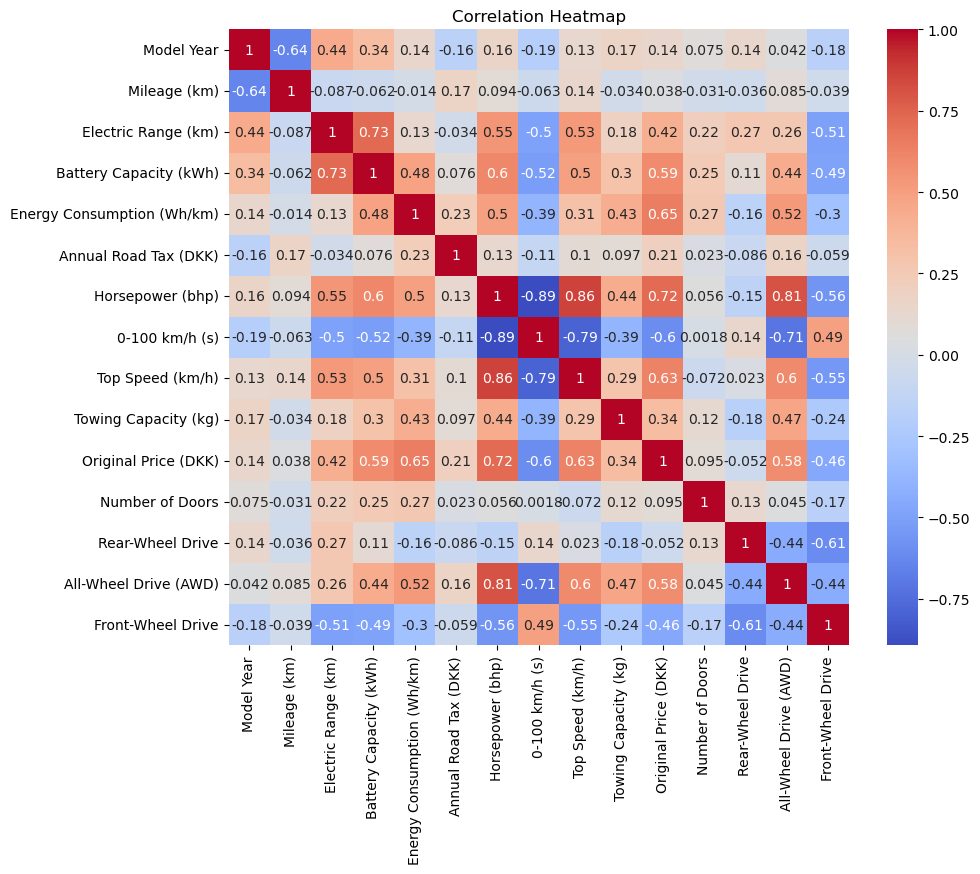

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Compute and print the correlation matrix
corr_matrix = X.corr()
print("Correlation Matrix:\n", corr_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


###### This calculates the correlations between variables in X and displays them as an annotated heatmap for quick visual insight.

In [37]:
#  Ordinary Least Squares (Library Version)
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

#  Predictions on the Test Set
y_pred_ols = ols_model.predict(X_test)

#  Performance Metrics: MSE, RMSE, R^2
mse_ols = mean_squared_error(y_test, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print("OLS Performance Metrics:")
print(f"  MSE : {mse_ols:.2f}")
print(f"  RMSE: {rmse_ols:.2f}")
print(f"  R^2 : {r2_ols:.4f}")

#  Comment on the Real-World Meaning of RMSE and R^2
print("\nReal-World Meaning:")
print("• RMSE is in the same units as the target (e.g., DKK), so if RMSE=20,000,")
print("  predictions are off by ~20,000 DKK on average.")
print("• R^2 measures how much of the variance in the target is explained by the model.")
print("  An R^2 close to 1 means the model captures most of the variability in car prices.")


OLS Performance Metrics:
  MSE : 2774486707.59
  RMSE: 52673.40
  R^2 : 0.8644

Real-World Meaning:
• RMSE is in the same units as the target (e.g., DKK), so if RMSE=20,000,
  predictions are off by ~20,000 DKK on average.
• R^2 measures how much of the variance in the target is explained by the model.
  An R^2 close to 1 means the model captures most of the variability in car prices.


######  This code fits a linear regression model with scikit-learn, predicts the target on the test set, calculates MSE, RMSE, and R², and then explains that RMSE gives you the average error in the original units (e.g., DKK) while R² indicates the variance explained by the model.

### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

### Data Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

# Scale X (features)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale y (target)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

print("Data has been scaled.")


Data has been scaled.


##### Scales both the features and target so all variables are on the same scale.

### Ridge, Lasso, Elastic Net (Multiple Alphas)

In [43]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    return (
        mean_squared_error(y_te, preds),
        r2_score(y_te, preds),
        model
    )

alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Ridge
best_ridge, best_mse_ridge, best_r2_ridge = None, float('inf'), None
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    mse, r2, mod = evaluate_model(ridge, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
    if mse < best_mse_ridge:
        best_mse_ridge, best_r2_ridge, best_ridge = mse, r2, mod

# Lasso
best_lasso, best_mse_lasso, best_r2_lasso = None, float('inf'), None
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    mse, r2, mod = evaluate_model(lasso, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
    if mse < best_mse_lasso:
        best_mse_lasso, best_r2_lasso, best_lasso = mse, r2, mod

# Elastic Net
best_enet, best_mse_enet, best_r2_enet = None, float('inf'), None
for alpha in alphas:
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=100000)
    mse, r2, mod = evaluate_model(enet, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
    if mse < best_mse_enet:
        best_mse_enet, best_r2_enet, best_enet = mse, r2, mod

print(f"Best Ridge => MSE={best_mse_ridge:.4f}, R^2={best_r2_ridge:.4f}")
print(f"Best Lasso => MSE={best_mse_lasso:.4f}, R^2={best_r2_lasso:.4f}")
print(f"Best ElasticNet => MSE={best_mse_enet:.4f}, R^2={best_r2_enet:.4f}")


Best Ridge => MSE=0.1252, R^2=0.8644
Best Lasso => MSE=0.1229, R^2=0.8669
Best ElasticNet => MSE=0.1238, R^2=0.8659


###### Runs Ridge, Lasso, and ElasticNet with different alpha values, and picks the best one (lowest MSE) for each.

### Rebuild OLS on Scaled Data & Discussion

In [50]:
from sklearn.linear_model import LinearRegression

ols_scaled = LinearRegression()
ols_scaled.fit(X_train_scaled, y_train_scaled)
ols_preds = ols_scaled.predict(X_test_scaled)

mse_ols_scaled = mean_squared_error(y_test_scaled, ols_preds)
r2_ols_scaled = r2_score(y_test_scaled, ols_preds)

print(f"OLS (Scaled) => MSE={mse_ols_scaled:.4f}, R^2={r2_ols_scaled:.4f}")

print("\nInterpretation of Coefficients with Scaled Data:")
print("- Each coefficient tells us how many standard deviations the target changes")
print("  when that feature increases by 1 standard deviation, holding other features constant.")
print("- Because y is also scaled, an MSE of e.g. 0.25 means predictions are off by ~0.5 std of y on average.")
print("- R^2 interpretation remains the same (proportion of variance explained).")


OLS (Scaled) => MSE=0.1252, R^2=0.8644

Interpretation of Coefficients with Scaled Data:
- Each coefficient tells us how many standard deviations the target changes
  when that feature increases by 1 standard deviation, holding other features constant.
- Because y is also scaled, an MSE of e.g. 0.25 means predictions are off by ~0.5 std of y on average.
- R^2 interpretation remains the same (proportion of variance explained).


###### Builds a regular OLS model on the scaled data and computes performance metrics.

### Compare the Top 5 Most Important Features

In [54]:
def top_features(model, columns, n=5):
    coefs = model.coef_
    return sorted(zip(columns, coefs), key=lambda x: abs(x[1]), reverse=True)[:n]

print("Top 5 Features (OLS Scaled):")
for feat, val in top_features(ols_scaled, X.columns):
    print(f"{feat}: {val:.4f}")

print("\nTop 5 Features (Best Ridge):")
for feat, val in top_features(best_ridge, X.columns):
    print(f"{feat}: {val:.4f}")

print("\nTop 5 Features (Best Lasso):")
for feat, val in top_features(best_lasso, X.columns):
    print(f"{feat}: {val:.4f}")

print("\nDiscussion:")
print("- Ridge typically shrinks coefficients but rarely zeros them out.")
print("- Lasso can set coefficients to zero, performing feature selection.")
print("- OLS has no regularization, so if there's multicollinearity, some coefficients may be large.")
print("- Comparing the top 5 features helps see whether the models agree on the most influential predictors.")


Top 5 Features (OLS Scaled):
Original Price (DKK): 0.8500
Model Year: 0.1680
Mileage (km): -0.1032
0-100 km/h (s): 0.0770
Electric Range (km): 0.0706

Top 5 Features (Best Ridge):
Original Price (DKK): 0.8500
Model Year: 0.1680
Mileage (km): -0.1032
0-100 km/h (s): 0.0770
Electric Range (km): 0.0706

Top 5 Features (Best Lasso):
Original Price (DKK): 0.8419
Model Year: 0.1691
Mileage (km): -0.0948
Electric Range (km): 0.0634
Annual Road Tax (DKK): -0.0512

Discussion:
- Ridge typically shrinks coefficients but rarely zeros them out.
- Lasso can set coefficients to zero, performing feature selection.
- OLS has no regularization, so if there's multicollinearity, some coefficients may be large.
- Comparing the top 5 features helps see whether the models agree on the most influential predictors.


###### Extracts the top 5 features by coefficient magnitude from OLS, Ridge, and Lasso, and compares them.